In [30]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fftpack import dct
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import soundfile
import sklearn
import shutil

import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from comet_ml import Experiment
import json

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
json_file_path = "/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/train_examples.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

In [9]:
df = pd.DataFrame(contents).T

In [10]:
df.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
guitar_acoustic_001-082-050,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
bass_synthetic_120-108-050,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
organ_electronic_120-050-127,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
guitar_electronic_021-026-025,146382,16000,26,1,guitar,guitar_electronic_021,guitar_electronic_021-026-025,"[fast_decay, percussive]",electronic,25,3,346,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
organ_electronic_011-079-075,244275,16000,79,1,organ,organ_electronic_011,organ_electronic_011-079-075,[bright],electronic,75,6,188,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [12]:
labels = list(df['instrument_family_str'].unique())
labels

['guitar',
 'bass',
 'organ',
 'keyboard',
 'vocal',
 'string',
 'reed',
 'flute',
 'mallet',
 'brass',
 'synth_lead']

In [37]:
labels[-1] = 'synth'
labels

['guitar',
 'bass',
 'organ',
 'keyboard',
 'vocal',
 'string',
 'reed',
 'flute',
 'mallet',
 'brass',
 'synth']

In [26]:
# def move_audio_to_class_folders(audio_folder):
#     for filename in os.listdir(audio_folder):
#         idx = filename.find('_')
#         class_ = os.path.basename(filename)[:idx]
#         if not os.path.isdir(os.path.join(audio_folder, class_)):
#             os.mkdir(os.path.join(audio_folder, class_))
#         while len(os.listdir(os.path.join(audio_folder, class_))) < 4000:
#             shutil.move(os.path.join(audio_folder,filename), os.path.join(audio_folder, class_))


In [31]:
# audio_folder = '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/train_audio_by_class'
# move_audio_to_class_folders(audio_folder)


In [ ]:
# #get dictionary with key: label, value: 
# files = dict()

# for label in labels:
#     random_file=random.choice(os.listdir(f"{audio_folder}/{label}"))
#     path_to_file = f'{audio_folder}/{label}/{random_file}'
#     files[label] = path_to_file
    
    
    

In [32]:
#get a random sample from each class
files = dict()
audio_folder = '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio'

In [38]:
for filename in os.listdir(audio_folder):
    idx = filename.find('_')
    for label in labels:
        if os.path.basename(filename)[:idx] == label:
            path_to_file = f'{audio_folder}/{filename}'
            files[label] = path_to_file
          

In [39]:
files


{'bass': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/bass_electronic_007-032-050.wav',
 'mallet': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/mallet_acoustic_003-036-075.wav',
 'keyboard': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/keyboard_acoustic_016-022-100.wav',
 'organ': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/organ_electronic_098-068-127.wav',
 'guitar': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/guitar_acoustic_020-024-127.wav',
 'brass': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/brass_acoustic_005-036-050.wav',
 'flute': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/flute_synthetic_002-052-127.wav',
 'vocal': '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/vocal_acoustic_027-059-050.wav',
 'reed': '/Users/ka

In [46]:
import seaborn as sns
sns.set()

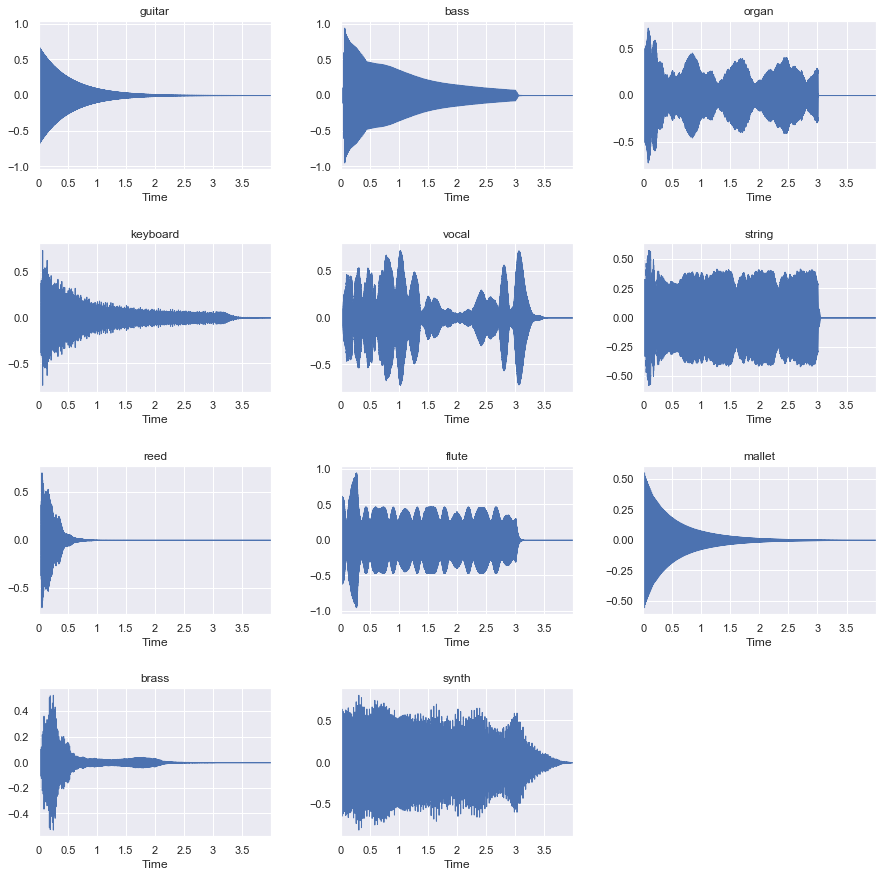

In [48]:
#plot example waveform from each class
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, label, in enumerate(labels):
    file_path = files[label]
    fig.add_subplot(4, 3, i+1)
    plt.title(label)
    audio, sr = librosa.load(file_path)
    librosa.display.waveplot(audio, sr=sr)
plt.savefig('../images/class_waveforms.png', bbox_inches='tight')

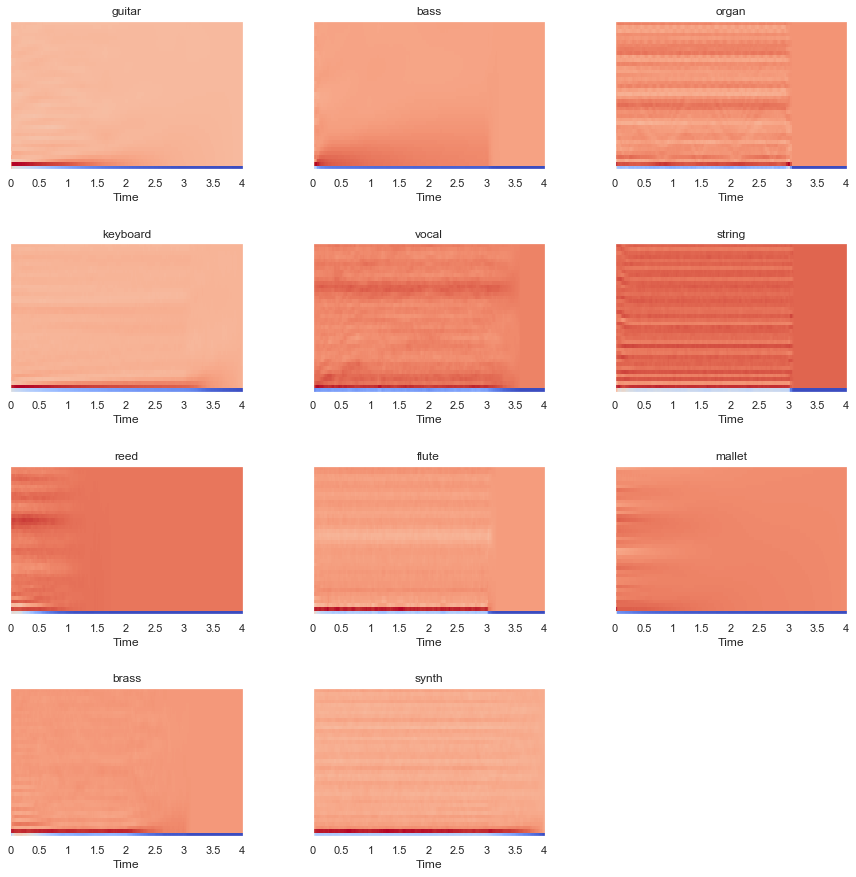

In [55]:
#plot example mfcc from each class
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, label, in enumerate(labels):
    file_path = files[label]
    fig.add_subplot(4, 3, i+1)
    plt.title(label)
    audio, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
#     print(mfccs.shape)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.savefig('../images/class_mfccs.png', bbox_inches='tight')

    

In [50]:
#to get mfcc features for a single file
def extract_mfcc_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed
    
    

In [53]:
mfcc_features_example = extract_mfcc_features('/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio/keyboard_acoustic_016-022-100.wav')

mfcc_features_example, mfcc_features_example.shape

(array([-4.4858969e+02,  1.9410739e+02,  7.1738319e+01,  1.4000756e+01,
         6.7717061e+00,  7.7440066e+00,  6.5514235e+00,  5.3761048e+00,
         2.7252634e+00,  6.3128150e-01, -5.2456146e-01, -2.7134376e+00,
        -3.4304435e+00, -4.0646138e+00, -5.3430872e+00, -3.7673368e+00,
         1.1497477e+00,  4.5282588e+00,  2.1018312e+00, -2.3141429e+00,
         4.2892191e-01,  9.2185431e+00,  1.0585829e+01, -7.4893415e-01,
        -1.2640872e+01, -1.2704010e+01, -8.0499430e+00, -8.9388561e+00,
        -8.8914051e+00, -4.1847544e+00, -3.3571842e+00, -6.7639575e+00,
        -6.3713236e+00, -3.5573640e+00, -2.0246427e+00,  7.7964777e-01,
         1.8827143e+00, -3.3007057e+00, -8.2006178e+00, -7.0908837e+00],
       dtype=float32),
 (40,))

In [63]:
#now get mfcc features for all files
#convert into a pandas dataframe with index as filename without '.wav'
audio_folder = '/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/audio'
features = []

for item in df.index:
    filename = item + '.wav'
    data = extract_mfcc_features(f'{audio_folder}/{filename}')
    class_label = df.loc[item]['instrument_family_str']
    features.append([data, class_label, item])
features

KeyboardInterrupt: 

In [58]:
#convert to df
featuresdf = pd.DataFrame(features, columns=['feature', 'class_label', 'item'])

featuresdf.head()

guitar_acoustic_001-082-050.wav
bass_synthetic_120-108-050.wav
organ_electronic_120-050-127.wav
guitar_electronic_021-026-025.wav
organ_electronic_011-079-075.wav


In [ ]:
featuresdf.iloc[0]['feature']

In [ ]:
featuresdf['class_label_num'] = featuresdf['class_label'].replace({
                        'bass': 0,
                        'brass': 1,
                        'flute': 2,
                        'guitar': 3,
                        'keyboard': 4,
                        'mallet': 5,
                        'organ': 6,
                        'reed': 7,
                        'string': 8,
                        'synth_lead': 9
                        'vocal': 10

})

In [ ]:
featuresdf.to_csv('../data/featuresdf.csv', index=None)

In [ ]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label_num.tolist())

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)


In [ ]:
#**ultimately test final model on "test" folder set, unseen data
#need to also extract this info for a test featuresdf

In [ ]:
#model

In [ ]:
#params
num_labels = 11
batch_size = 32
num_epochs = 100

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(40,)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
model.summary()

In [ ]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
#fit
model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
         validation_data = (X_test, y_test), verbose=2)

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))